In [1]:
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

os.chdir("../")

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection/other_research
Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection


In [3]:
import numpy as np
import utils
from sklearn.preprocessing import RobustScaler
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
)

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

## Read data

In [5]:
RANDOM_SEED = 42
PATH = "data/processed/processed_NE016_10_data.csv"
df_train, df_val, df_test = utils.read_split_data(PATH)

## Process data

In [6]:
scaler = RobustScaler()
scaler = scaler.fit(df_train[utils.FEATURE_LIST])

dataframes = [df_train, df_test]
for df in dataframes:
    df[utils.FEATURE_LIST] = scaler.transform(df[utils.FEATURE_LIST])

In [7]:
X_nested = from_2d_array_to_nested(df_train[utils.FEATURE_LIST])

In [8]:
X_test_nested = from_2d_array_to_nested(df_test[utils.FEATURE_LIST])

## Time Series forest

In [9]:
model = TimeSeriesForestClassifier()
model.fit(X_nested, df_train[utils.TARGET_COL])

TimeSeriesForestClassifier()

In [10]:
df_test["anomaly"] = model.predict(X_test_nested)

In [11]:
y_test = df_test[utils.TARGET_COL]
y_pred = df_test["anomaly"]

## Evaluate results

Prediction binary_accuracy (mapped) = 92.44659073014539%
Prediction F-score (mapped) = 0.333487725798981


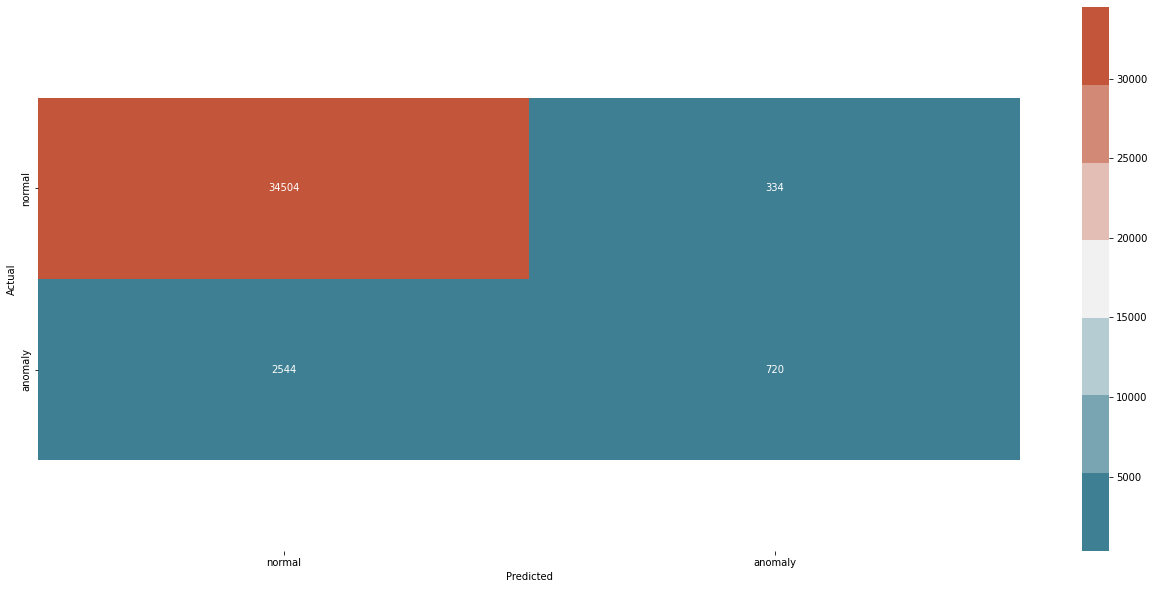


 Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     34838
           1       0.68      0.22      0.33      3264

    accuracy                           0.92     38102
   macro avg       0.81      0.61      0.65     38102
weighted avg       0.91      0.92      0.91     38102



(0.924465907301454, 0.333487725798981)

In [13]:
utils.show_metrics(y_pred, y_test)